In [37]:
# erase blanks from audios => short audio with only speech

import librosa
import numpy as np
import soundfile as sf
import torchaudio
from torch import Tensor
import torch

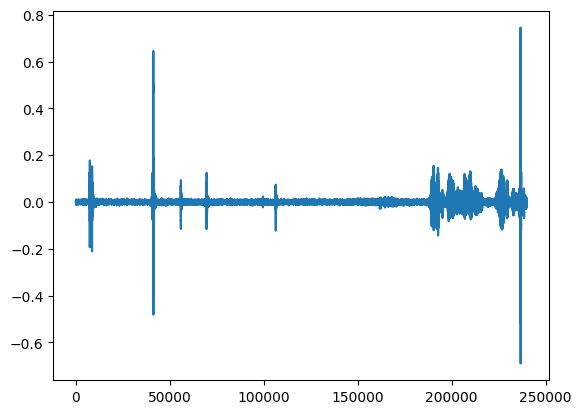

In [34]:
load_audio = lambda x: librosa.load(x, sr=16000)[0]

audio = load_audio('test.wav')

# display audio
def display_audio(audio):
    import matplotlib.pyplot as plt
    plt.plot(audio)
    plt.show()

def display_audio_tensor(audio):
    import matplotlib.pyplot as plt
    plt.plot(audio.squeeze().numpy())
    plt.show()

display_audio(audio)

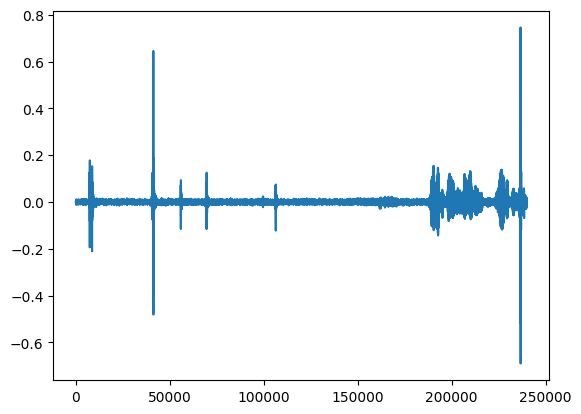

(240000,)
[[  6656  10240]
 [ 39936  43008]
 [ 55296  57344]
 [ 68608  71168]
 [105472 107520]
 [188416 196096]
 [197120 217088]
 [223744 230912]
 [231936 239616]]


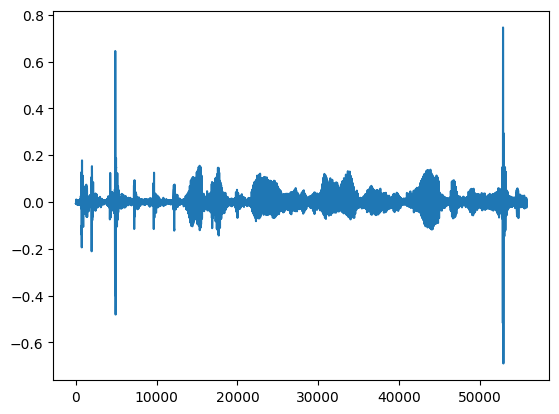

(55808,)


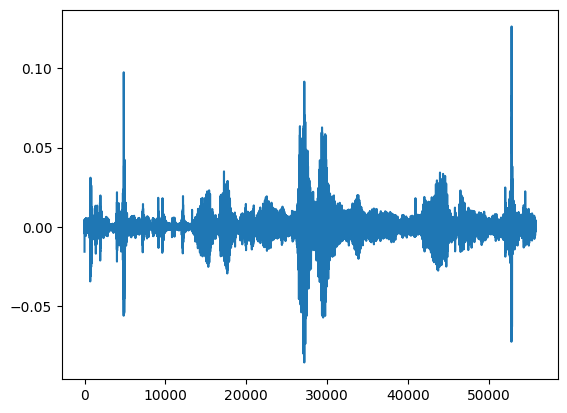

(55808,)


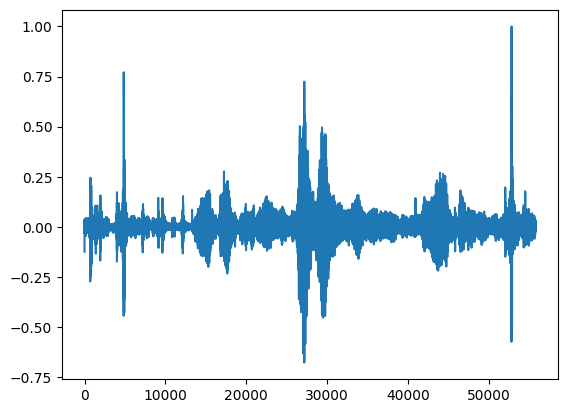

(55808,)


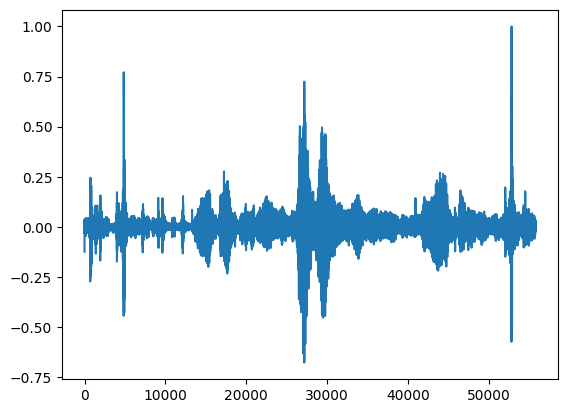

In [40]:
audio_tensor, sr = torchaudio.load('test.wav')
if sr != 16000:
    audio_tensor = torchaudio.transforms.Resample(sr, 16000)(audio_tensor)
if audio_tensor.shape[0] == 2:
    audio_tensor = audio_tensor.mean(dim=0, keepdim=True)
display_audio_tensor(audio_tensor)

audio = audio_tensor.squeeze().numpy()

print(audio.shape)

intervals = librosa.effects.split(audio, top_db=20)
print(intervals)

restore = np.concatenate([audio[start:end] for start, end in intervals])
display_audio(restore)
print(restore.shape)

# suppress pick sound, equalize
restore = librosa.effects.preemphasis(restore)
display_audio(restore)
print(restore.shape)

# normalize
restore = librosa.util.normalize(restore)
display_audio(restore)
print(restore.shape)

# convert to tensor
restore_tensor_2 = Tensor(restore).unsqueeze(0)
# save audio
sf.write('restore.wav', restore, 16000)

display_audio_tensor(restore_tensor_2)

In [ ]:
# same with torchaudio
import torchaudio

audio, sr = torchaudio.load('test.wav')
audio = audio.squeeze().numpy()
